### Importing libraries that is needed for Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ensure data is imported successfully, ensuring values are numeric data, checking for duplication, null and missing values, and outliers.

In [2]:
raw_dbts_df = pd.read_csv('Dataset_Nurul Liyana.csv') 

Importing the dataset putting into dbts_df as diabetes_dataframe for short

In [3]:
raw_dbts_df.head() 

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Successfully import dataset

In [4]:
raw_dbts_df.shape

(253680, 22)

The raw dataframe has 253680 rows and 22 columns

In [5]:
raw_dbts_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
unique_values = {}          #checking unique values in different variables
for col in raw_dbts_df.columns:
    unique_values[col] = raw_dbts_df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


Dropping columns that are not important

In [7]:
dbts_df = raw_dbts_df.drop(columns=['CholCheck','AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','Education','Income'])

In [8]:
dbts_df.shape

(253680, 15)

Updated dataframe has 15 columns after dropping the columns mention above.

### Provide appropriate statistics (e.g. range, mode, mean, median, variance, counts, etc.) for the most important features/columns.

In [9]:
dbts_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

Current column names 

In [10]:
df = dbts_df.rename(columns={"Diabetes_012": "Diabetes", "HighBP": "h_BP", "HighChol": "h_Chol" , "BMI": "BMI_grp", "HeartDiseaseorAttack": "Heart_Con" , "PhysActivity": "Phys_Act" , "HvyAlcoholConsump": "Hvy_Alcoholer", "DiffWalk": "Walk_Prob"})

Giving a shorter name for dataframe for easy use and rename for easier understanding and shorter names for columns

In [11]:
bins = [0,18,25,30,999]
labels = [1,2,3,4]
df.BMI_grp = pd.cut(df['BMI_grp'], bins=bins, labels=labels, right=False)

Grouping BMI range to 4 category: Under weight(1), Healthy weight(2), Over weight(3) and Obese(4) for easy visualisation for later.

In [12]:
df['BMI_grp'] = df['BMI_grp'].astype(float)

In [13]:
print("Shape",df.shape)  # Display the shape number of rows and number of columns
print(df.dtypes)         # Display the data type for each column

Shape (253680, 15)
Diabetes         float64
h_BP             float64
h_Chol           float64
BMI_grp          float64
Smoker           float64
Stroke           float64
Heart_Con        float64
Phys_Act         float64
Fruits           float64
Veggies          float64
Hvy_Alcoholer    float64
GenHlth          float64
Walk_Prob        float64
Sex              float64
Age              float64
dtype: object


In [14]:
df.describe()

,Diabetes,h_BP,h_Chol,BMI_grp,Smoker,Stroke,Heart_Con,Phys_Act,Fruits,Veggies,Hvy_Alcoholer,GenHlth,Walk_Prob,Sex,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,3.056950,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,2.511392,0.168224,0.440342,8.032119
std,0.698160,0.494934,0.494210,0.801786,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,1.068477,0.374066,0.496429,3.054220
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.000000,10.000000
max,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,13.000000


In [15]:
unique_values = {}          #checking unique values in different variables
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes,3
h_BP,2
h_Chol,2
BMI_grp,4
Smoker,2
Stroke,2
Heart_Con,2
Phys_Act,2
Fruits,2
Veggies,2


In [16]:
# Checking for duplication for whole data
duplication = df.duplicated().sum()
print('Total duplication:',duplication,'rows')

Total duplication: 188326 rows


Keeping the duplication rows as these might be different patients with almost similar conditions

In [17]:
# Null checks for all columns
df.isnull().sum()

Diabetes         0
h_BP             0
h_Chol           0
BMI_grp          0
Smoker           0
Stroke           0
Heart_Con        0
Phys_Act         0
Fruits           0
Veggies          0
Hvy_Alcoholer    0
GenHlth          0
Walk_Prob        0
Sex              0
Age              0
dtype: int64

No Null values

### Carry out correlation and/or analysis done on the main features/columns identified.

In [18]:
df.groupby(['Diabetes']).count()

,h_BP,h_Chol,BMI_grp,Smoker,Stroke,Heart_Con,Phys_Act,Fruits,Veggies,Hvy_Alcoholer,GenHlth,Walk_Prob,Sex,Age
Diabetes,,,,,,,,,,,,,,
0.0,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703
1.0,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631
2.0,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346


There are 3 category for Diabetes which is Non-Diabetic(0.0), Pre-Diabetic(1.0) and Diabetic(2.0)

In [19]:
# Grouping Diabetes_012: 1.0 and 2.0 together
df['Diabetes'].replace({2.0:1.0}, inplace=True)


In [20]:
df.groupby(['Diabetes']).count() #Check again

,h_BP,h_Chol,BMI_grp,Smoker,Stroke,Heart_Con,Phys_Act,Fruits,Veggies,Hvy_Alcoholer,GenHlth,Walk_Prob,Sex,Age
Diabetes,,,,,,,,,,,,,,
0.0,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703
1.0,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977


Now Diabetes is categorized into 2 which is Non-Diabetic(0.0) and Diabetic(1.0). Pre-Diabetic is categorized as Diabetic.

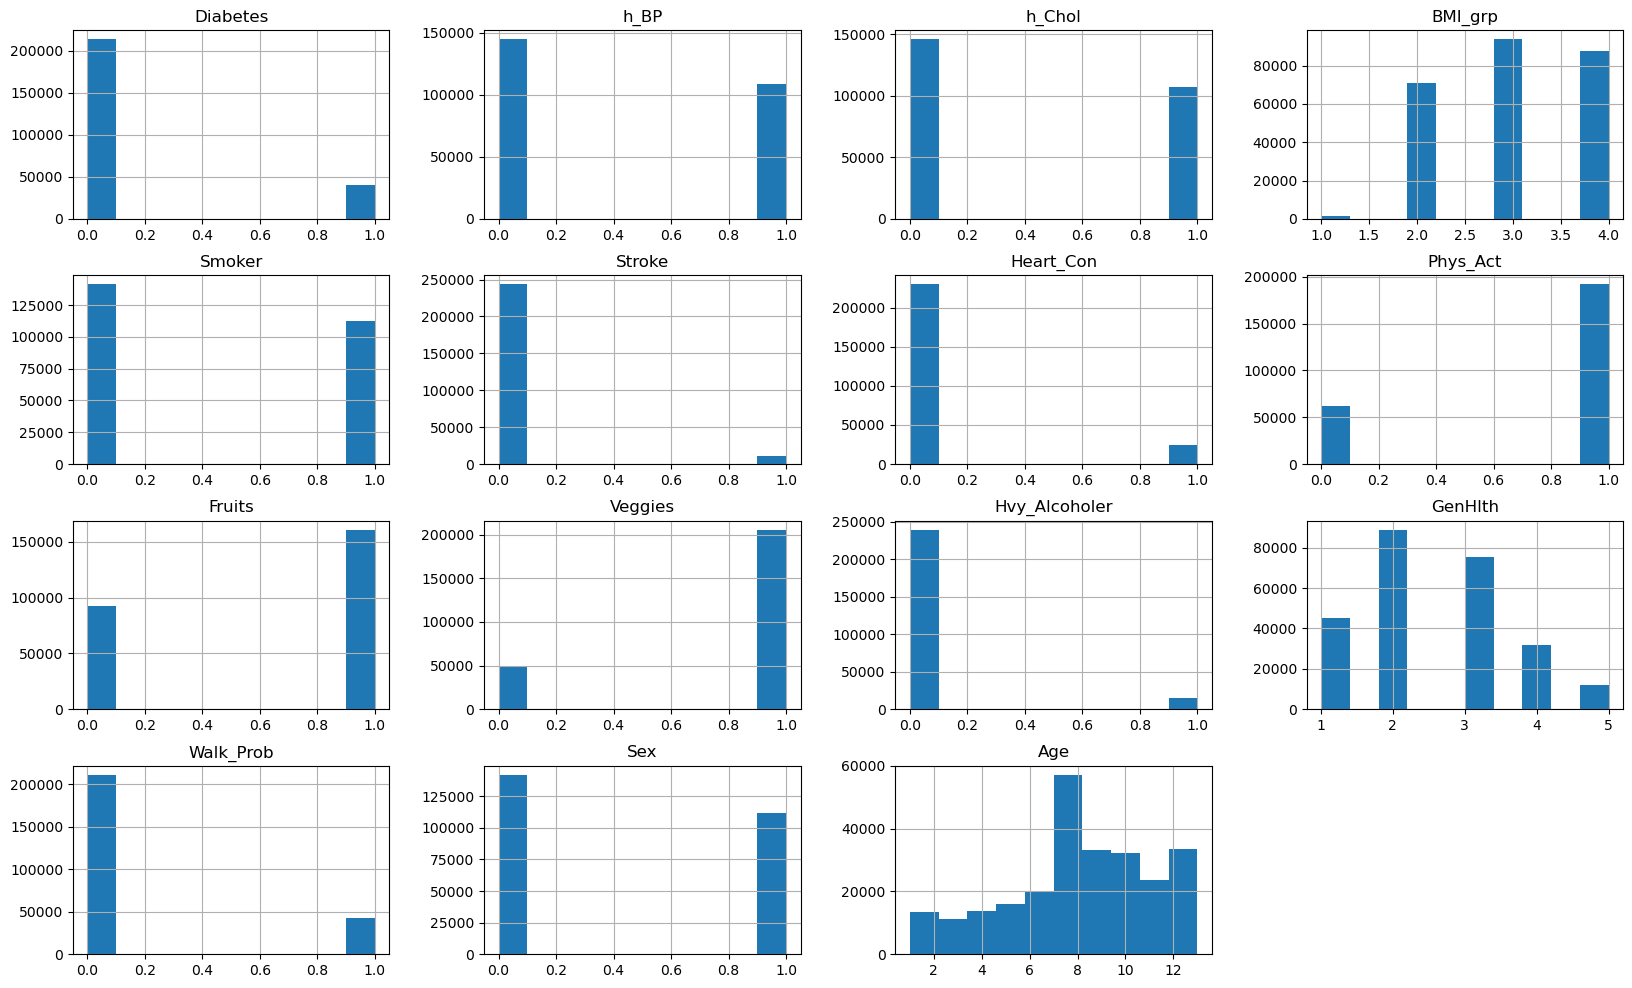

In [21]:
df.hist(figsize=(20,12));


The value counts of all 15 columns.
There are continuous column and discrete columns.
The frequency of values in diffrent columns.

In [22]:
multicolinearity_check = df.corr()
multicolinearity_check


,Diabetes,h_BP,h_Chol,BMI_grp,Smoker,Stroke,Heart_Con,Phys_Act,Fruits,Veggies,Hvy_Alcoholer,GenHlth,Walk_Prob,Sex,Age
Diabetes,1.000000,0.270334,0.210290,0.212598,0.062778,0.104800,0.176933,-0.121392,-0.042088,-0.059219,-0.056682,0.300785,0.222155,0.029606,0.185891
h_BP,0.270334,1.000000,0.298199,0.227503,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.300530,0.223618,0.052207,0.344452
h_Chol,0.210290,0.298199,1.000000,0.131612,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.208426,0.144672,0.031205,0.272318
BMI_grp,0.212598,0.227503,0.131612,1.000000,0.021779,0.019858,0.059642,-0.128911,-0.089759,-0.062561,-0.048287,0.220122,0.154694,0.090623,-0.004770
Smoker,0.062778,0.096991,0.091299,0.021779,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,0.163143,0.122463,0.093662,0.120641
Stroke,0.104800,0.129575,0.092620,0.019858,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.177942,0.176567,0.002978,0.126974
Heart_Con,0.176933,0.209361,0.180765,0.059642,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.258383,0.212709,0.086096,0.221618
Phys_Act,-0.121392,-0.125267,-0.078046,-0.128911,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,-0.266186,-0.253174,0.032482,-0.092511
Fruits,-0.042088,-0.040555,-0.040859,-0.089759,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,-0.103854,-0.048352,-0.091175,0.064547
Veggies,-0.059219,-0.061266,-0.039874,-0.062561,-0.030678,-0.041124,-0.039167,0.153150,0.254342,1.000000,0.021064,-0.123066,-0.080506,-0.064765,-0.009771


<AxesSubplot:>

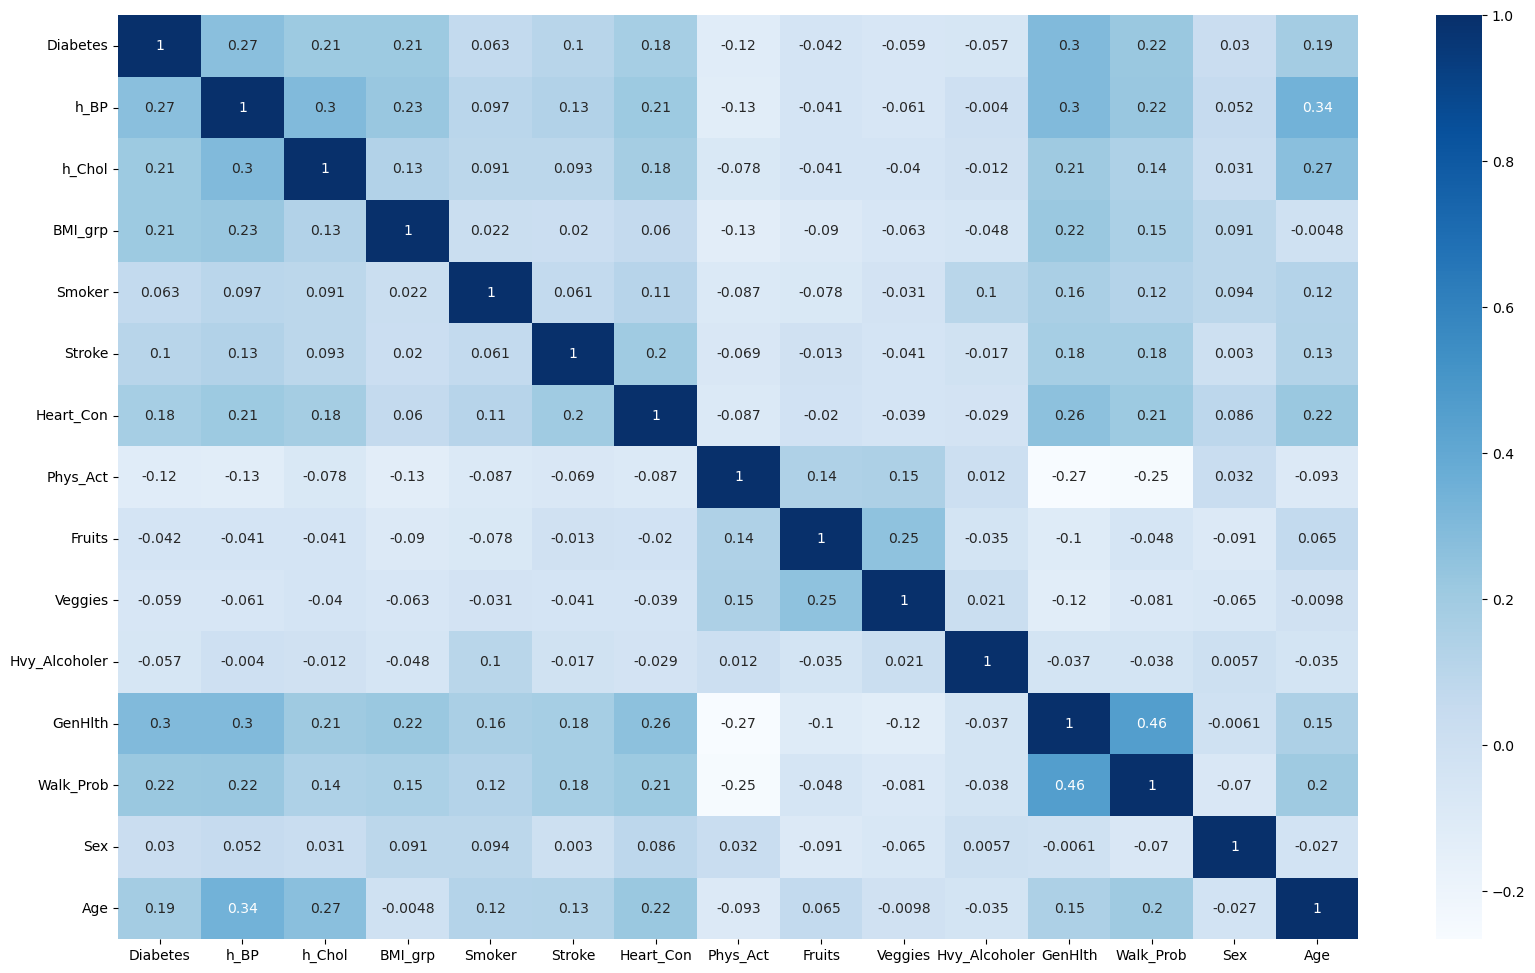

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

Seems like the features are not correlated to one another

### Things I want to know

In [24]:
df.head()

,Diabetes,h_BP,h_Chol,BMI_grp,Smoker,Stroke,Heart_Con,Phys_Act,Fruits,Veggies,Hvy_Alcoholer,GenHlth,Walk_Prob,Sex,Age
0,0.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0
1,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0
2,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0,9.0
3,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0
4,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0


In [25]:
df.groupby(['Diabetes']).count()

,h_BP,h_Chol,BMI_grp,Smoker,Stroke,Heart_Con,Phys_Act,Fruits,Veggies,Hvy_Alcoholer,GenHlth,Walk_Prob,Sex,Age
Diabetes,,,,,,,,,,,,,,
0.0,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703
1.0,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977,39977


In [26]:
df2 = df.copy() #creating a copy to assist in showing the relation between features clearly
cols = ['h_BP', 'h_Chol', 'BMI_grp', 'Smoker', 'Stroke', 'Heart_Con',
       'Phys_Act', 'Fruits', 'Veggies', 'Hvy_Alcoholer', 'GenHlth', 'Walk_Prob', 'Sex', 'Age']

df2.Diabetes[df2['Diabetes'] == 0] = 'No Diabetes'
df2.Diabetes[df2['Diabetes'] == 1] = 'Diabetes'

df2.h_BP[df2['h_BP'] == 0] = 'No High BP'
df2.h_BP[df2['h_BP'] == 1] = 'High BP'

df2.h_Chol[df2['h_Chol'] == 0] = 'No High Cholesterol'
df2.h_Chol[df2['h_Chol'] == 1] = 'High Cholesterol'

df2.BMI_grp[df2['BMI_grp'] == 1] = 'Under Weight'
df2.BMI_grp[df2['BMI_grp'] == 2] = 'Healthy Weight'
df2.BMI_grp[df2['BMI_grp'] == 3] = 'Over Weight'
df2.BMI_grp[df2['BMI_grp'] == 4] = 'Obese'

df2.Smoker[df2['Smoker'] == 0] = 'No Smoke'
df2.Smoker[df2['Smoker'] == 1] = 'Smoke'

df2.Stroke[df2['Stroke'] == 0] = 'No Stroke'
df2.Stroke[df2['Stroke'] == 1] = 'Stroke'

df2.Heart_Con[df2['Heart_Con'] == 0] = 'No Heart Cond'
df2.Heart_Con[df2['Heart_Con'] == 1] = 'Heart Cond'

df2.Phys_Act[df2['Phys_Act'] == 0] = 'No Physical Act'
df2.Phys_Act[df2['Phys_Act'] == 1] = 'Physical Act'

df2.Fruits[df2['Fruits'] == 0] = 'No Fruits'
df2.Fruits[df2['Fruits'] == 1] = 'Fruits'

df2.Veggies[df2['Veggies'] == 0] = 'No Veggies'
df2.Veggies[df2['Veggies'] == 1] = 'Veggies'

df2.Hvy_Alcoholer[df2['Hvy_Alcoholer'] == 0] = 'No Heavy Alcohol'
df2.Hvy_Alcoholer[df2['Hvy_Alcoholer'] == 1] = 'Heavy Alcohol'

df2.GenHlth[df2['GenHlth'] == 5] = 'Excellent'
df2.GenHlth[df2['GenHlth'] == 4] = 'Very Good'
df2.GenHlth[df2['GenHlth'] == 3] = 'Good'
df2.GenHlth[df2['GenHlth'] == 2] = 'Fair'
df2.GenHlth[df2['GenHlth'] == 1] = 'Poor'

df2.Walk_Prob[df2['Walk_Prob'] == 0] = 'No Walk Prob'
df2.Walk_Prob[df2['Walk_Prob'] == 1] = 'Walk Prob'

df2.Sex[df2['Sex'] == 0] = 'Female'
df2.Sex[df2['Sex'] == 1] = 'Male'

df2.Age[df2['Age'] == 1] = '18 to 24'
df2.Age[df2['Age'] == 2] = '25 to 29'
df2.Age[df2['Age'] == 3] = '30 to 34'
df2.Age[df2['Age'] == 4] = '35 to 39'
df2.Age[df2['Age'] == 5] = '40 to 44'
df2.Age[df2['Age'] == 6] = '45 to 49'
df2.Age[df2['Age'] == 7] = '50 to 54'
df2.Age[df2['Age'] == 8] = '55 to 59'
df2.Age[df2['Age'] == 9] = '60 to 64'
df2.Age[df2['Age'] == 10] = '65 to 69'
df2.Age[df2['Age'] == 11] = '70 to 74'
df2.Age[df2['Age'] == 12] = '75 to 79'
df2.Age[df2['Age'] == 13] = '80 or older'

df2['Total'] = 1


/var/folders/bq/1n8bgy_57l74n18m4pnvpyj00000gn/T/ipykernel_28725/386031640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.h_BP[df2['h_BP'] == 0] = 'No High BP'
/var/folders/bq/1n8bgy_57l74n18m4pnvpyj00000gn/T/ipykernel_28725/386031640.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.h_Chol[df2['h_Chol'] == 0] = 'No High Cholesterol'
/var/folders/bq/1n8bgy_57l74n18m4pnvpyj00000gn/T/ipykernel_28725/386031640.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [27]:
df2.head()

,Diabetes,h_BP,h_Chol,BMI_grp,Smoker,Stroke,Heart_Con,Phys_Act,Fruits,Veggies,Hvy_Alcoholer,GenHlth,Walk_Prob,Sex,Age,Total
0,No Diabetes,High BP,High Cholesterol,Obese,Smoke,No Stroke,No Heart Cond,No Physical Act,No Fruits,Veggies,No Heavy Alcohol,Excellent,Walk Prob,Female,60 to 64,1
1,No Diabetes,No High BP,No High Cholesterol,Over Weight,Smoke,No Stroke,No Heart Cond,Physical Act,No Fruits,No Veggies,No Heavy Alcohol,Good,No Walk Prob,Female,50 to 54,1
2,No Diabetes,High BP,High Cholesterol,Over Weight,No Smoke,No Stroke,No Heart Cond,No Physical Act,Fruits,No Veggies,No Heavy Alcohol,Excellent,Walk Prob,Female,60 to 64,1
3,No Diabetes,High BP,No High Cholesterol,Over Weight,No Smoke,No Stroke,No Heart Cond,Physical Act,Fruits,Veggies,No Heavy Alcohol,Fair,No Walk Prob,Female,70 to 74,1
4,No Diabetes,High BP,High Cholesterol,Healthy Weight,No Smoke,No Stroke,No Heart Cond,Physical Act,Fruits,Veggies,No Heavy Alcohol,Fair,No Walk Prob,Female,70 to 74,1


We will see whether:
1. High Blood Pressure and High Cholesterol are risk factors of Diabetes (2)




In [28]:
df2.groupby(['h_BP','h_Chol','Diabetes'])[['Total']].count()

Total
h_BP       h_Chol              Diabetes          
High BP    High Cholesterol    Diabetes     21233
                               No Diabetes  43427
           No High Cholesterol Diabetes      8284
                               No Diabetes  35885
No High BP High Cholesterol    Diabetes      5328
                               No Diabetes  37603
           No High Cholesterol Diabetes      5132
                               No Diabetes  96788

<AxesSubplot:xlabel='h_BP,h_Chol'>

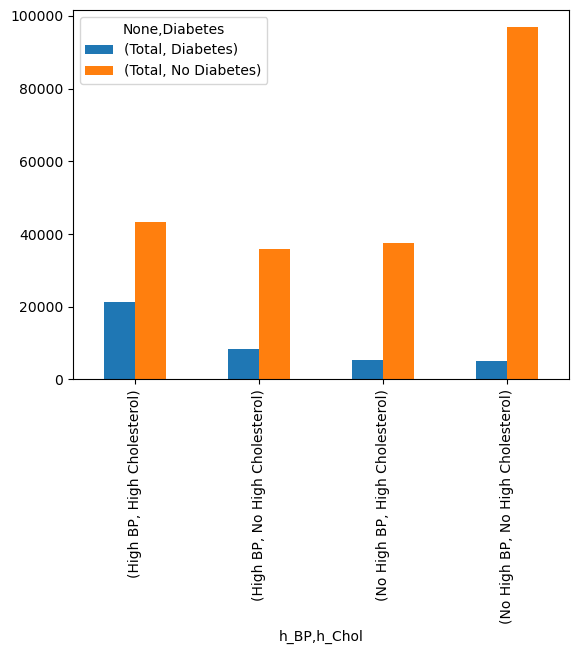

In [29]:
df2.groupby(['h_BP','h_Chol','Diabetes'])[['Total']].count().unstack().plot.bar()

From the observation above: 
1. 21,233 Diabetes patients has High Blood Pressure and High Cholestrol.
2. 8,284 Diabetes patients has High Blood Pressure only.
3. 5,328 Diabetes patients has High Cholestrol only.
4. While the remaining 5,132 Diabetes patients does not have any High Blood Pressure or High Cholestrol

5. 96,788 patients has neither of the 3 illnesses.
6. While the other remaining 116,915 patients either have High Blood Pressure or High Cholestrol but has no Diabetes.
7. In conclusion, even having High Blood Pressure and High Cholestrol doesn't determine the risk of getting Diabetes.

2. Which BMI group are most affected getting Diabetes and what did they claim for their general health



In [30]:
df2.groupby(['GenHlth','BMI_grp','Diabetes'])[['Total']].count()

Total
GenHlth   BMI_grp        Diabetes          
Excellent Healthy Weight Diabetes       574
                         No Diabetes   2083
          Obese          Diabetes      3060
                         No Diabetes   2653
          Over Weight    Diabetes      1256
                         No Diabetes   2254
          Under Weight   Diabetes        39
                         No Diabetes    162
Fair      Healthy Weight Diabetes      1072
                         No Diabetes  25013
          Obese          Diabetes      3711
                         No Diabetes  22710
          Over Weight    Diabetes      2800
                         No Diabetes  33451
          Under Weight   Diabetes        12
                         No Diabetes    315
Good      Healthy Weight Diabetes      1652
                         No Diabetes  14200
          Obese          Diabetes      8828
                         No Diabetes  23960
          Over Weight    Diabetes      4686
                         No Diabetes  21975
          Under Weight   Diabetes        19
                         No Diabetes    326
Poor      Healthy Weight Diabetes       303
                         No Diabetes  19708
          Obese          Diabetes       586
                         No Diabetes   6781
          Over Weight    Diabetes       563
                         No Diabetes  17132
          Under Weight   Diabetes         1
                         No Diabetes    225
Very Good Healthy Weight Diabetes      1114
                         No Diabetes   5037
          Obese          Diabetes      6760
                         No Diabetes   8802
          Over Weight    Diabetes      2913
                         No Diabetes   6719
          Under Weight   Diabetes        28
                         No Diabetes    197

<AxesSubplot:xlabel='GenHlth,BMI_grp'>

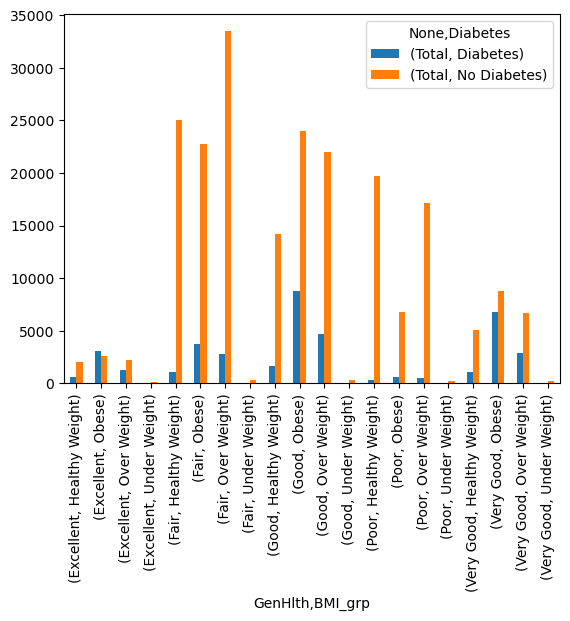

In [31]:
df2.groupby(['GenHlth','BMI_grp','Diabetes'])[['Total']].count().unstack().plot.bar()

3. Does eating fruits and veggies lessen the risk of getting Diabetes 



In [32]:
df2.groupby(['Fruits','Veggies','Diabetes'])[['Total']].count()

Total
Fruits    Veggies    Diabetes           
Fruits    No Veggies Diabetes       3734
                     No Diabetes   14452
          Veggies    Diabetes      19748
                     No Diabetes  122964
No Fruits No Veggies Diabetes       5946
                     No Diabetes   23707
          Veggies    Diabetes      10549
                     No Diabetes   52580

<AxesSubplot:xlabel='Fruits,Veggies'>

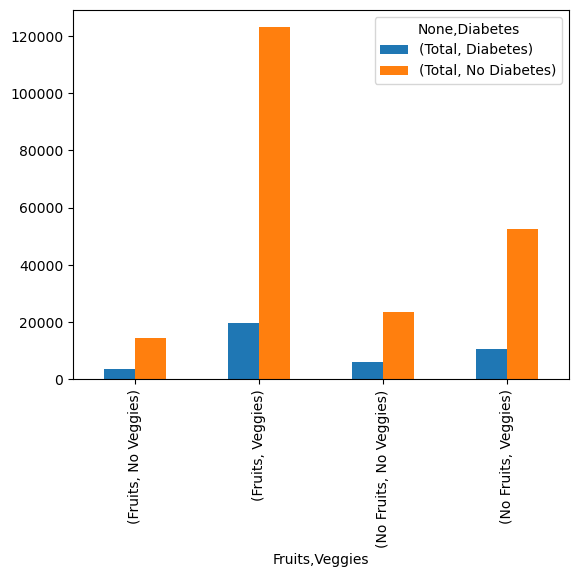

In [33]:
df2.groupby(['Fruits','Veggies','Diabetes'])[['Total']].count().unstack().plot.bar()

4. If getting stroke and heart conditions also risk of Diabetes 



In [65]:
df2.groupby(['Stroke','Heart_Con','Diabetes'])[['Total']].count()

Total
Stroke    Heart_Con     Diabetes           
No Stroke Heart Cond    Diabetes       6805
                        No Diabetes   13151
          No Heart Cond Diabetes      29639
                        No Diabetes  193793
Stroke    Heart Cond    Diabetes       1737
                        No Diabetes    2200
          No Heart Cond Diabetes       1796
                        No Diabetes    4559

<AxesSubplot:xlabel='Stroke,Heart_Con'>

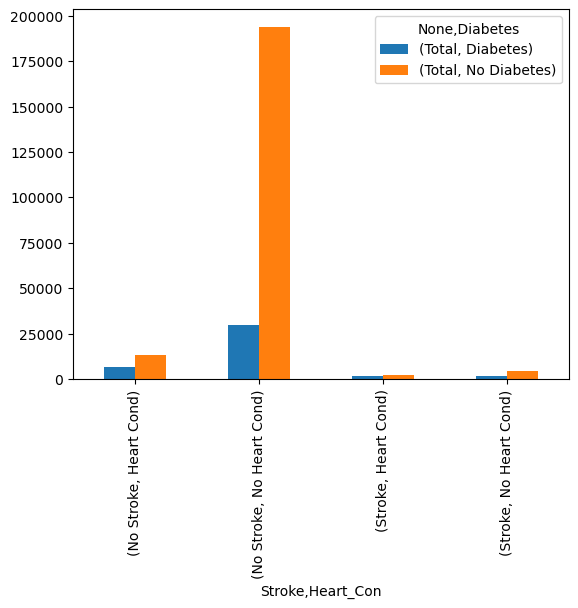

In [66]:
df2.groupby(['Stroke','Heart_Con','Diabetes'])[['Total']].count().unstack().plot.bar()

5. Does Diabetes patients do physical activity and has walking problem (2)


In [36]:
df2.groupby(['Phys_Act','Walk_Prob','Diabetes'])[['Total']].count()

Total
Phys_Act        Walk_Prob    Diabetes           
No Physical Act No Walk Prob Diabetes       6980
                             No Diabetes   34080
                Walk Prob    Diabetes       7568
                             No Diabetes   13132
Physical Act    No Walk Prob Diabetes      18591
                             No Diabetes  151354
                Walk Prob    Diabetes       6838
                             No Diabetes   15137

<AxesSubplot:xlabel='Phys_Act,Walk_Prob'>

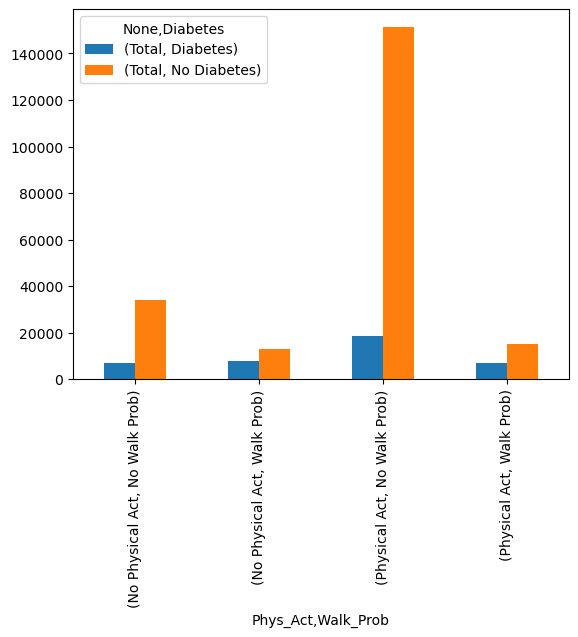

In [37]:
df2.groupby(['Phys_Act','Walk_Prob','Diabetes'])[['Total']].count().unstack().plot.bar()



6. Being a Heavy alcohol consumption and Smoking are risk factors of Diabetes 



In [68]:
df2.groupby(['Smoker','Hvy_Alcoholer','Diabetes'])[['Total']].count()

Total
Smoker   Hvy_Alcoholer    Diabetes           
No Smoke Heavy Alcohol    Diabetes        266
                          No Diabetes    4723
         No Heavy Alcohol Diabetes      19112
                          No Diabetes  117156
Smoke    Heavy Alcohol    Diabetes        774
                          No Diabetes    8493
         No Heavy Alcohol Diabetes      19825
                          No Diabetes   83331

<AxesSubplot:xlabel='Smoker,Hvy_Alcoholer'>

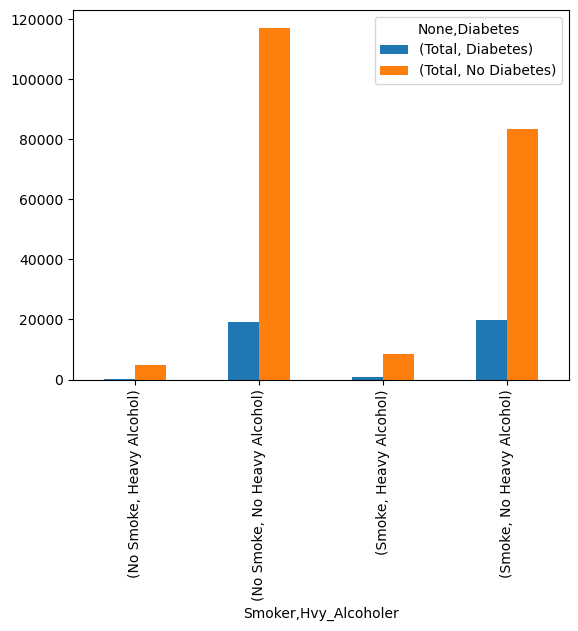

In [69]:
df2.groupby(['Smoker','Hvy_Alcoholer','Diabetes'])[['Total']].count().unstack().plot.bar()

7. Diabetes patient's most affected in which gender and which group of Age

In [40]:
df2.groupby(['Age','Sex','Diabetes'])[['Total']].count()

Total
Age         Sex    Diabetes          
18 to 24    Female Diabetes        61
                   No Diabetes   2684
            Male   Diabetes        38
                   No Diabetes   2917
25 to 29    Female Diabetes       126
                   No Diabetes   3865
            Male   Diabetes        68
                   No Diabetes   3539
30 to 34    Female Diabetes       243
                   No Diabetes   5819
            Male   Diabetes       143
                   No Diabetes   4918
35 to 39    Female Diabetes       446
                   No Diabetes   7279
            Male   Diabetes       322
                   No Diabetes   5776
40 to 44    Female Diabetes       672
                   No Diabetes   8464
            Male   Diabetes       542
                   No Diabetes   6479
45 to 49    Female Diabetes      1087
                   No Diabetes   9841
            Male   Diabetes       967
                   No Diabetes   7924
50 to 54    Female Diabetes      1876
                   No Diabetes  12929
            Male   Diabetes      1630
                   No Diabetes   9879
55 to 59    Female Diabetes      2582
                   No Diabetes  14887
            Male   Diabetes      2231
                   No Diabetes  11132
60 to 64    Female Diabetes      3353
                   No Diabetes  14918
            Male   Diabetes      3082
                   No Diabetes  11891
65 to 69    Female Diabetes      3623
                   No Diabetes  14120
            Male   Diabetes      3632
                   No Diabetes  10819
70 to 74    Female Diabetes      2877
                   No Diabetes  10282
            Male   Diabetes      2866
                   No Diabetes   7508
75 to 79    Female Diabetes      2075
                   No Diabetes   7343
            Male   Diabetes      1773
                   No Diabetes   4789
80 or older Female Diabetes      1994
                   No Diabetes   8528
            Male   Diabetes      1668
                   No Diabetes   5173

<AxesSubplot:xlabel='Age,Sex'>

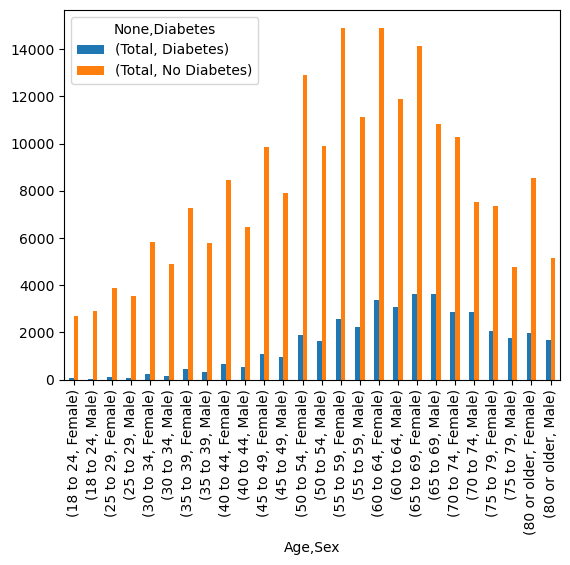

In [41]:
df2.groupby(['Age','Sex','Diabetes'])[['Total']].count().unstack().plot.bar()

In [42]:
unique_values = {}          #checking unique values in different variables
for col in df2.columns:
    unique_values[col] = df2[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes,2
h_BP,2
h_Chol,2
BMI_grp,4
Smoker,2
Stroke,2
Heart_Con,2
Phys_Act,2
Fruits,2
Veggies,2


In [43]:
def create_plot_pivot(data, x_col):
    df_plot = data.groupby([x_col, 'Diabetes']).size().reset_index().pivot(columns='Diabetes', index=x_col, values=0)
    return df_plot

/var/folders/bq/1n8bgy_57l74n18m4pnvpyj00000gn/T/ipykernel_28725/2474358125.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


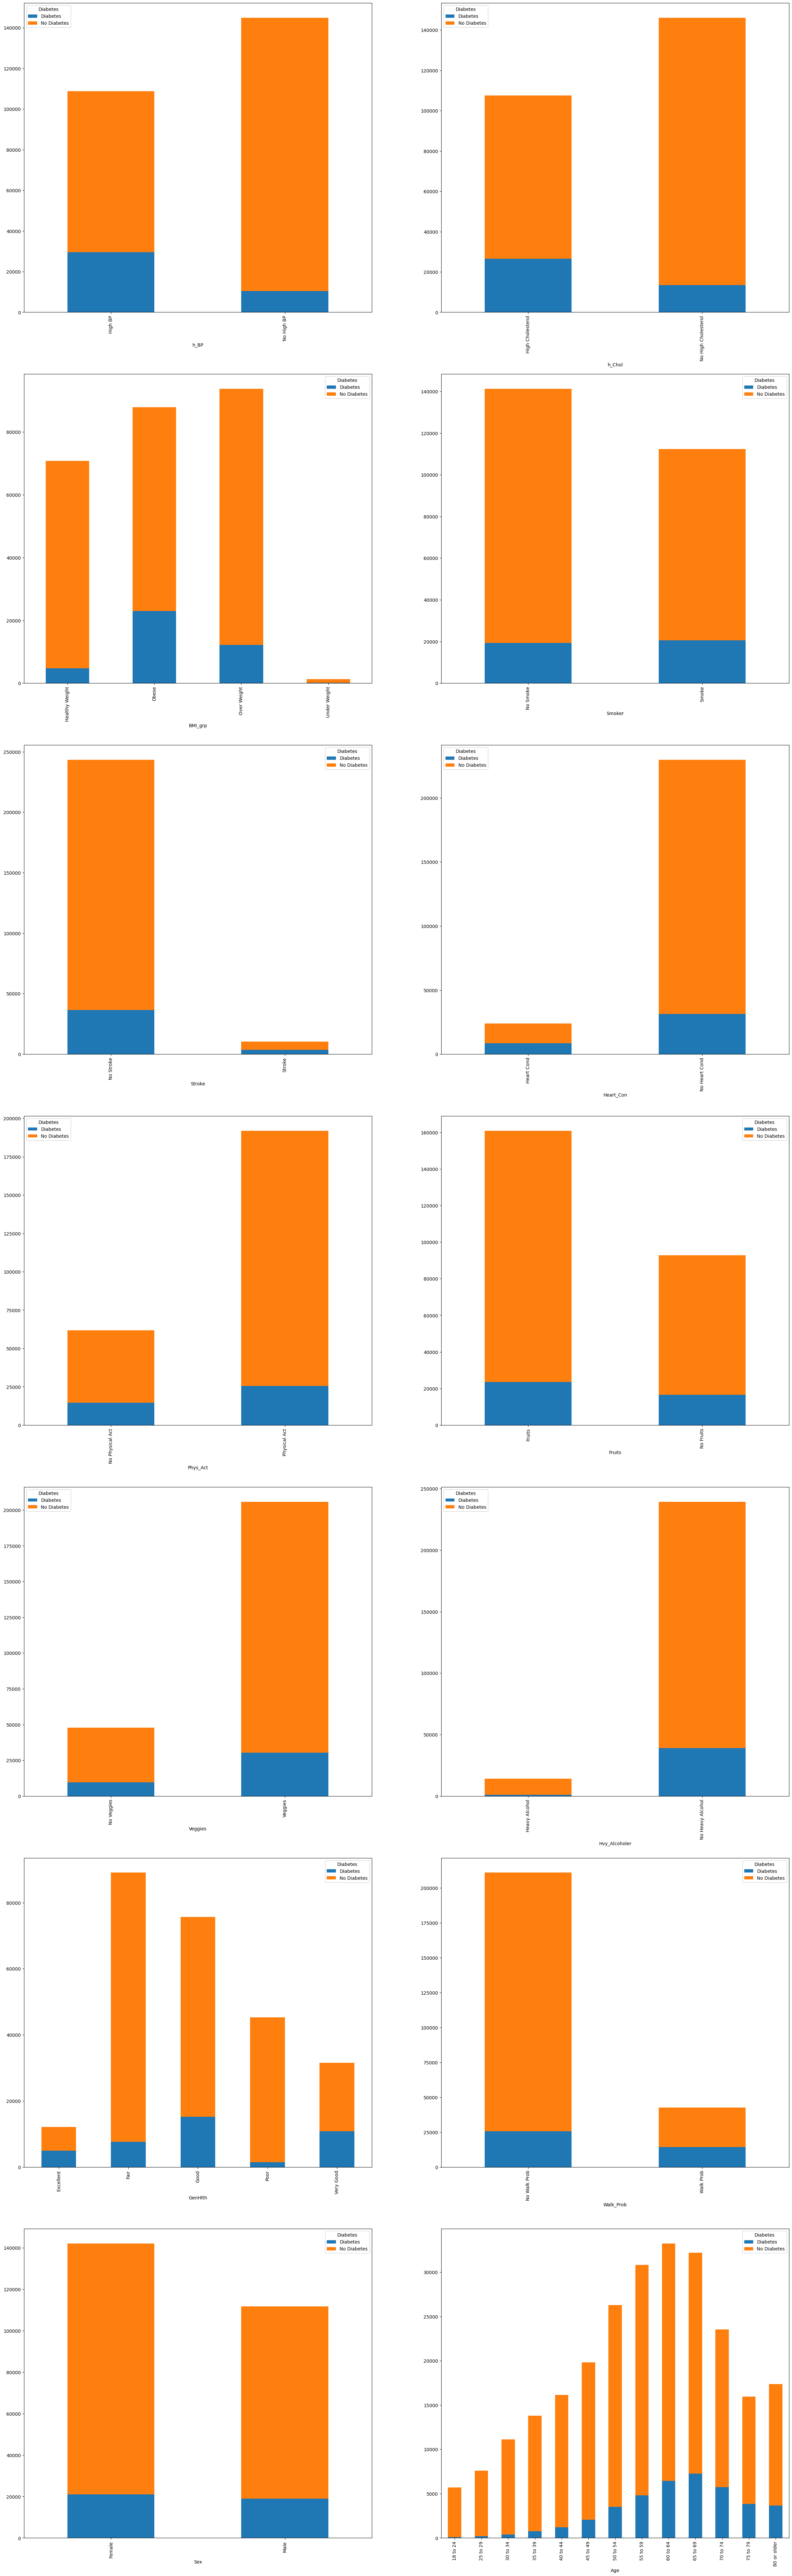

In [44]:
fig, ax = plt.subplots(7, 2, figsize=(30,100))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

### Machine Learning initial steps

In [45]:
# Train Test Split and Feature Scaling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter


### Data distribution analysis

In [46]:
X = df.drop("Diabetes" , axis=1)
Y = df["Diabetes"]

In [47]:
X.columns

Index(['h_BP', 'h_Chol', 'BMI_grp', 'Smoker', 'Stroke', 'Heart_Con',
       'Phys_Act', 'Fruits', 'Veggies', 'Hvy_Alcoholer', 'GenHlth',
       'Walk_Prob', 'Sex', 'Age'],
      dtype='object')

In [48]:
Y.value_counts()


0.0    213703
1.0     39977
Name: Diabetes, dtype: int64

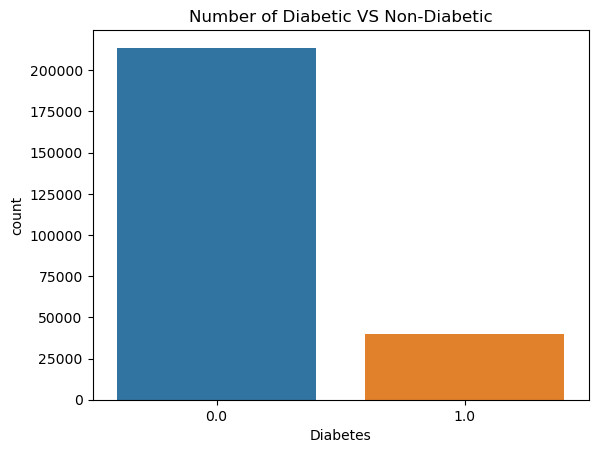

In [49]:
sns.countplot(x=Y, data = df)
plt.title('Number of Diabetic VS Non-Diabetic')
plt.show()

In [50]:
# fitting SMOTE to the train set
smote = SMOTE(random_state=28)
smote_X_train, smote_Y_train = smote.fit_resample(X, Y)

In [51]:
print("Before sampling class distribution:", Counter(Y))
print("After sampling class distribution:", Counter(smote_Y_train))


Before sampling class distribution: Counter({0.0: 213703, 1.0: 39977})
After sampling class distribution: Counter({0.0: 213703, 1.0: 213703})


### Train and Test

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
# Split into training and test set
# 80% of the input for training and 20% for testing
X_train , X_test , Y_train , Y_test = train_test_split(smote_X_train , smote_Y_train , test_size = 0.2, random_state = 28)

In [54]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(Y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(Y_test.shape))

Shape of the X_train (341924, 14)
Shape of the y_train (341924,)
Shape of the X_test (85482, 14)
Shape of the y_test (85482,)


In [55]:
# Feature Scaling using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train out models

There are 10 models that I searched for and created a for loop to run them so i could put them in a dataframe.

These models are part ofsupervised learning and ensemble learning
which includes:
1. Logistic Regression (Classification)
2. Naive Bayes (Classification)
3. Decision Tree (Classification)
4. K-Nearest Neighbour (Classification)
5. Random Forest (Bagging)
6. XGBoost (Boosting)
7. Catboost (Boosting)
8. AdaBoost (Boosting)
9. ExtraTree (Bagging)
10. SVC Linear (Classification)


In [147]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC

from datetime import datetime
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Model Train and Model Testing

In [57]:
LogReg = LogisticRegression()
Guassian = GaussianNB()
DecTree = DecisionTreeClassifier(max_depth=5)
KNNeighbour = KNeighborsClassifier(n_neighbors = 5, p = 2)
RandomForest = RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced') #, max_features='auto'
Xgboost = XGBClassifier(max_depth=4, n_estimators=500)
Catboost = CatBoostClassifier(eval_metric='AUC', metric_period=20, logging_level='Silent')
AdaBoost = AdaBoostClassifier(base_estimator= RandomForestClassifier())
ExtraTree = ExtraTreeClassifier(max_depth=5)
SVClin = LinearSVC(random_state=0, tol=1e-5)

In [58]:
algos = [LogReg, Guassian, DecTree, KNNeighbour, RandomForest, Xgboost, Catboost, AdaBoost, ExtraTree, SVClin]

names = ['Logistic_Regression','Guassian','Decision_Tree','K-Nearest Neighbour','RandomForest','Xgboost','Catboost','AdaBoost','ExtraTree','SVClinear'] 

act_pre_list = []       # Actual and Predicted
roc_list = []           # ROC
time_list = []          # Time taken
conf_met = []           # Confusion metrics
acsc_list = []          # Accuracy score
Y_Pseries = []          # Y_Predictions
cm_acsc_list = []       # Confusion Matrix Accuracy Score

In [59]:
for name in algos:
    start_time = datetime.now()
    if name == SVClin:
        model = name
        model.fit(X_train,Y_train.ravel())
        end_time = datetime.now()
        Y_pred = model.predict(X_test)
    else:    
        model = name
        model.fit(X_train,Y_train)
        end_time = datetime.now()
        Y_pred = model.predict_proba(X_test)[:,1]

    Y_Pseries.append(Y_pred)

    df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
    act_pre_list.append(df)

    time_taken = format(end_time - start_time)
    time_list.append(time_taken)


/Users/kaseh/opt/anaconda3/envs/lesson1/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Testing and putting the Y_Pred in to a list so that it'll would be easier to be displayed

In [62]:
len(Y_Pseries)

10

Arranging the Scores(ROC_AUC, Accuracy and Confusion Matrix)

In [63]:
for i in range(len(Y_Pseries)):    
    score = roc_auc_score(Y_test,Y_Pseries[i])
    roc_list.append(score)

    cm = confusion_matrix(Y_test, Y_Pseries[i].round()) 
    conf_met.append(cm)

    acsc = accuracy_score(Y_test,Y_Pseries[i].round())
    acsc_list.append(acsc)

    cm_score = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
    cm_acsc_list.append(cm_score)

Model Evaluation

In [64]:
evaluation = pd.DataFrame({'Model': names,'ROC AUC Score': roc_list,'Accuracy Score': acsc_list,'CM Score': cm_acsc_list,'Confusion Matrix': conf_met,'Time taken(s)': time_list})

evaluation = evaluation.sort_values(by='ROC AUC Score', ascending=False)
evaluation

,Model,ROC AUC Score,Accuracy Score,CM Score,Confusion Matrix,Time taken(s)
6,Catboost,0.919845,0.831543,0.831543,"[[35936, 6805], [7595, 35146]]",0:00:16.904670
5,Xgboost,0.918872,0.830315,0.830315,"[[35903, 6838], [7667, 35074]]",0:00:23.606730
7,AdaBoost,0.910717,0.839896,0.839896,"[[35159, 7582], [6104, 36637]]",0:17:54.186838
3,K-Nearest Neighbour,0.846917,0.770794,0.770794,"[[33494, 9247], [10346, 32395]]",0:00:00.357229
4,RandomForest,0.831260,0.754170,0.754170,"[[30977, 11764], [9250, 33491]]",0:01:01.167985
2,Decision_Tree,0.814371,0.739945,0.739945,"[[28970, 13771], [8459, 34282]]",0:00:00.248422
0,Logistic_Regression,0.813933,0.741337,0.741337,"[[30648, 12093], [10018, 32723]]",0:00:00.203615
1,Guassian,0.782302,0.721731,0.721731,"[[31134, 11607], [12180, 30561]]",0:00:00.073837
8,ExtraTree,0.767945,0.708137,0.708137,"[[26218, 16523], [8426, 34315]]",0:00:00.290814
9,SVClinear,0.741080,0.741080,0.741080,"[[30351, 12390], [9743, 32998]]",0:00:50.767865


### Visualisation

ROC AUC - Logistic Regression

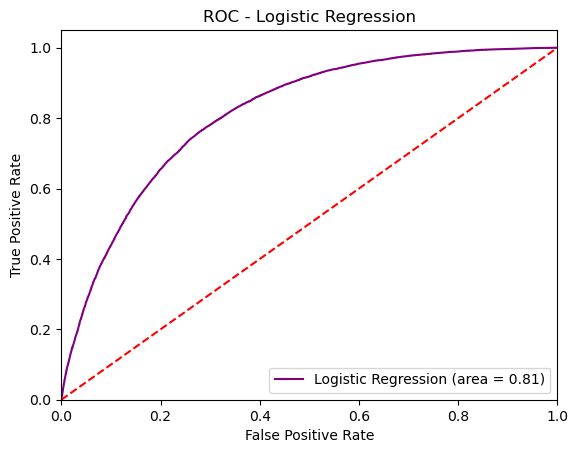

In [91]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_Pseries[0]) 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_list[0],color='purple')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('ROC1')

plt.show()


ROC AUC - Guassian

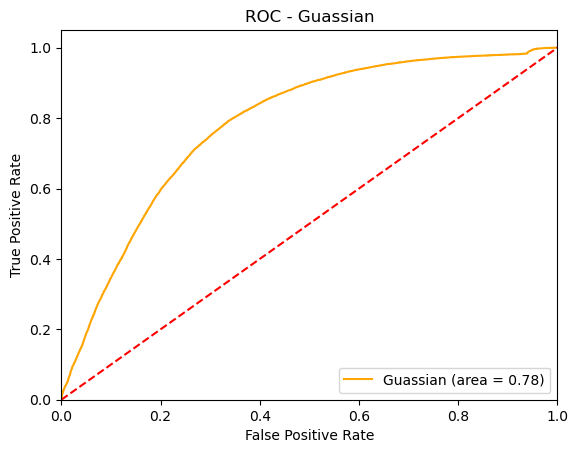

In [92]:
fpr1, tpr1, thresholds1 = roc_curve(Y_test, Y_Pseries[1]) 
plt.plot(fpr1, tpr1, label='Guassian (area = %0.2f)' % roc_list[1],color='orange')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Guassian')
plt.legend(loc="lower right")
plt.savefig('ROC2')

plt.show()


ROC AUC - Decision_Tree

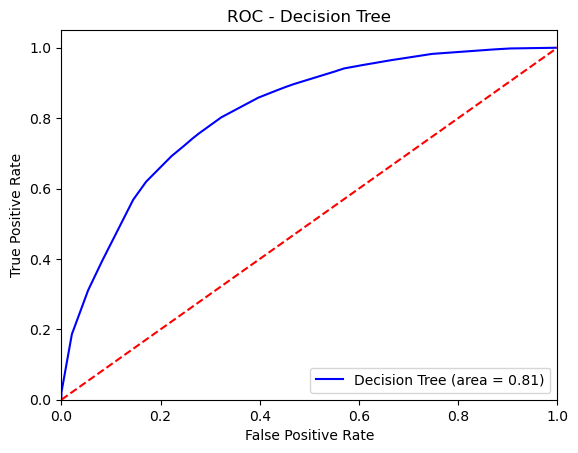

In [93]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test, Y_Pseries[2]) 
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_list[2],color='blue')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc="lower right")
plt.savefig('ROC3')

plt.show()


ROC AUC - K-Nearest Neighbour

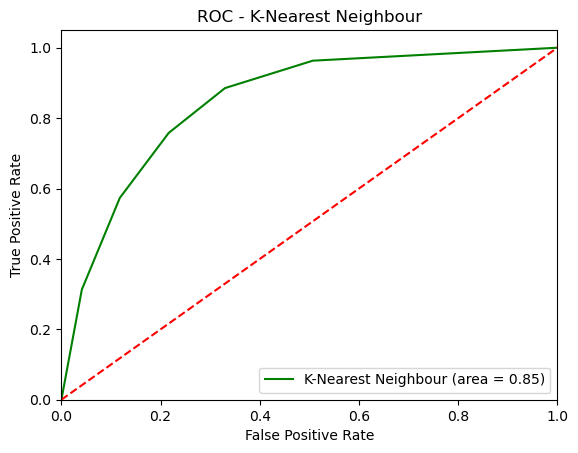

In [94]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test, Y_Pseries[3]) 
plt.plot(fpr3, tpr3, label='K-Nearest Neighbour (area = %0.2f)' % roc_list[3],color='green')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - K-Nearest Neighbour')
plt.legend(loc="lower right")
plt.savefig('ROC4')

plt.show()


ROC AUC - RandomForest

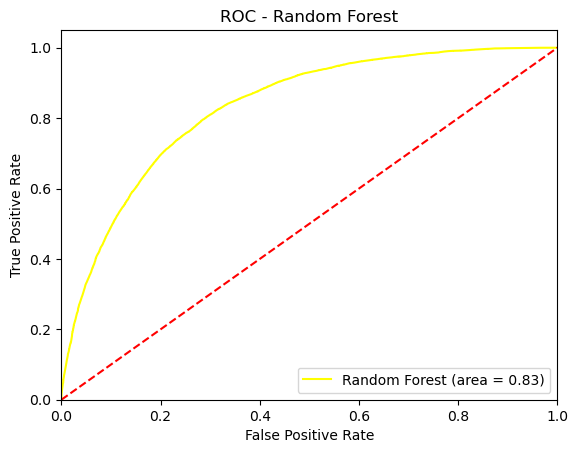

In [95]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test, Y_Pseries[4]) 
plt.plot(fpr4, tpr4, label='Random Forest (area = %0.2f)' % roc_list[4],color='yellow')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc="lower right")
plt.savefig('ROC5')

plt.show()


ROC AUC - Xgboost

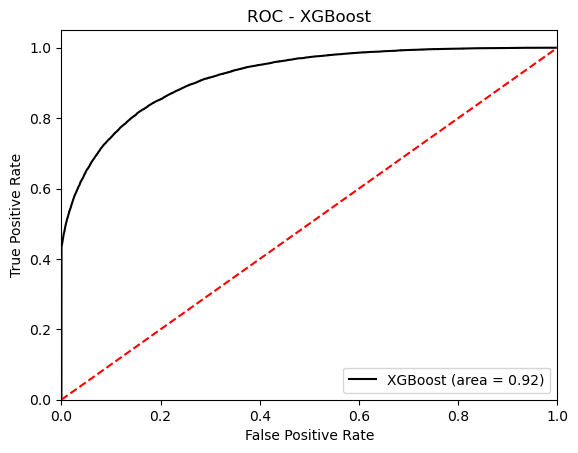

In [96]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test, Y_Pseries[5]) 
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_list[5],color='black')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - XGBoost')
plt.legend(loc="lower right")
plt.savefig('ROC6')

plt.show()


ROC AUC - Catboost

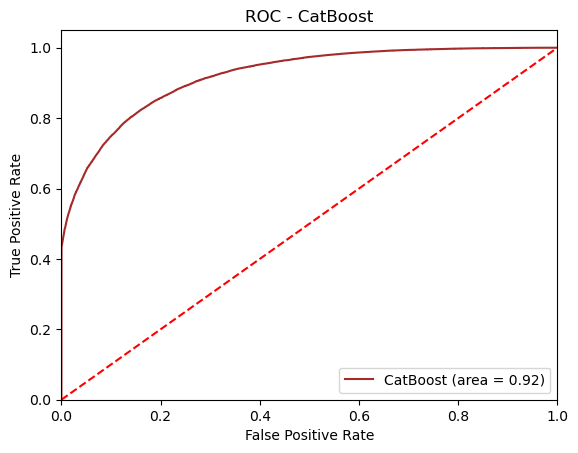

In [97]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test, Y_Pseries[6]) 
plt.plot(fpr6, tpr6, label='CatBoost (area = %0.2f)' % roc_list[6],color='brown')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - CatBoost')
plt.legend(loc="lower right")
plt.savefig('ROC7')

plt.show()


ROC AUC - AdaBoost

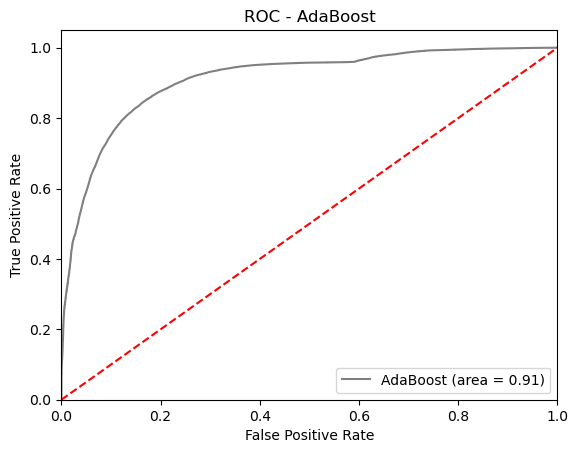

In [98]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test, Y_Pseries[7]) 
plt.plot(fpr7, tpr7, label='AdaBoost (area = %0.2f)' % roc_list[7],color='grey')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AdaBoost')
plt.legend(loc="lower right")
plt.savefig('ROC8')

plt.show()


ROC AUC - ExtraTree

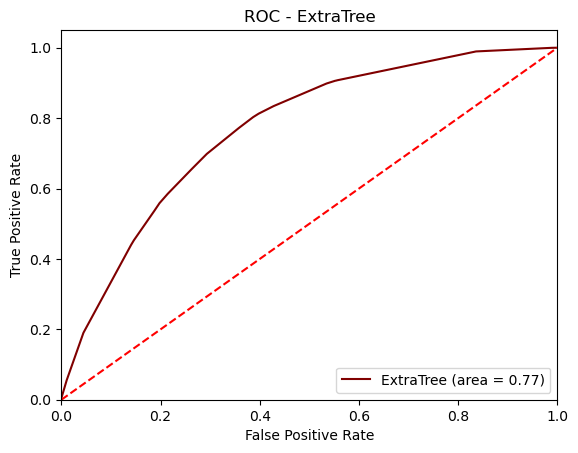

In [99]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test, Y_Pseries[8]) 
plt.plot(fpr8, tpr8, label='ExtraTree (area = %0.2f)' % roc_list[8],color='maroon')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - ExtraTree')
plt.legend(loc="lower right")
plt.savefig('ROC9')

plt.show()


ROC AUC - SVClinear

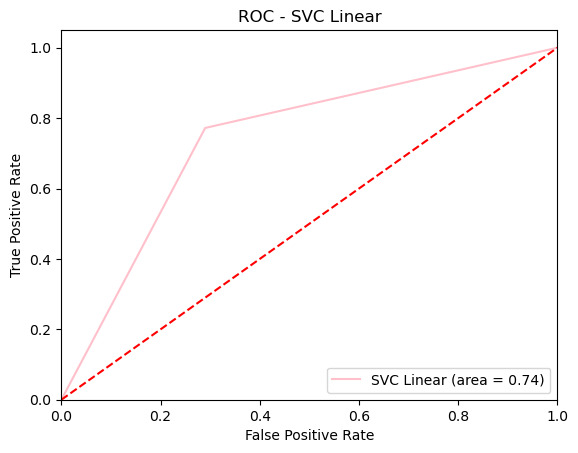

In [100]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test, Y_Pseries[9]) 
plt.plot(fpr9, tpr9, label='SVC Linear (area = %0.2f)' % roc_list[9],color='pink')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVC Linear')
plt.legend(loc="lower right")
plt.savefig('ROC10')

plt.show()


Comparision of Actual and Predicted - Linear Regression

In [137]:
act_pre_list[0].head()

,Actual,Predicted
3468,1.0,0.941152
207261,0.0,0.626525
147729,0.0,0.198319
401174,1.0,0.770454
307769,1.0,0.751856


Comparision of Actual and Predicted - Guassian

In [138]:
act_pre_list[1].head()

,Actual,Predicted
3468,1.0,0.999985
207261,0.0,0.543204
147729,0.0,0.034288
401174,1.0,0.828925
307769,1.0,0.911269


Comparision of Actual and Predicted - Decision Tree

In [139]:
act_pre_list[2].head()

,Actual,Predicted
3468,1.0,0.887304
207261,0.0,0.676226
147729,0.0,0.169111
401174,1.0,0.792138
307769,1.0,0.792138


Comparision of Actual and Predicted - K-Nearest Neighbour

In [140]:
act_pre_list[3].head()

,Actual,Predicted
3468,1.0,1.0
207261,0.0,0.4
147729,0.0,0.0
401174,1.0,0.8
307769,1.0,0.6


Comparision of Actual and Predicted - Random forest

In [141]:
act_pre_list[4].head()

,Actual,Predicted
3468,1.0,0.835858
207261,0.0,0.592174
147729,0.0,0.210492
401174,1.0,0.732307
307769,1.0,0.772811


Comparision of Actual and Predicted - XGBoost

In [142]:
act_pre_list[5].head()

,Actual,Predicted
3468,1.0,0.787497
207261,0.0,0.651620
147729,0.0,0.051549
401174,1.0,0.765803
307769,1.0,0.999959


Comparision of Actual and Predicted - CatBoost

In [143]:
act_pre_list[6].head()

,Actual,Predicted
3468,1.0,0.767885
207261,0.0,0.628550
147729,0.0,0.052851
401174,1.0,0.782375
307769,1.0,0.999726


Comparision of Actual and Predicted - AdaBoost

In [144]:
act_pre_list[7].head()

,Actual,Predicted
3468,1.0,0.906227
207261,0.0,0.503509
147729,0.0,0.479146
401174,1.0,0.508842
307769,1.0,0.874657


Comparision of Actual and Predicted - ExtraTree

In [145]:
act_pre_list[8].head()

,Actual,Predicted
3468,1.0,0.833664
207261,0.0,0.728019
147729,0.0,0.387799
401174,1.0,0.728019
307769,1.0,0.799415


Comparision of Actual and Predicted - SVC Linear

In [146]:
act_pre_list[9].head()

,Actual,Predicted
3468,1.0,1.0
207261,0.0,1.0
147729,0.0,0.0
401174,1.0,1.0
307769,1.0,1.0


Looking only at the top 3 heatmaps


Making the Confusion Matrix - CatBoost

[[35936  6805]
 [ 7595 35146]]


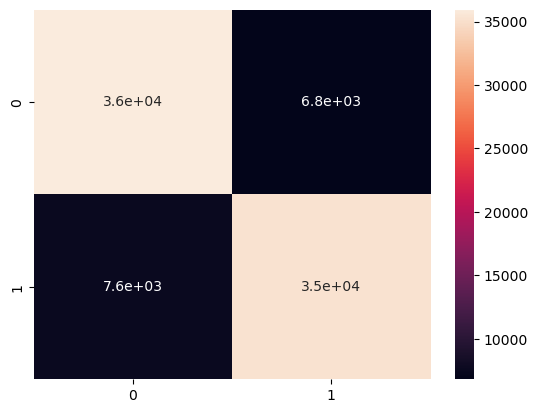

In [101]:
sns.heatmap(conf_met[6], annot=True)
print(conf_met[6])

Making the Confusion Matrix - XGBoost

[[35903  6838]
 [ 7667 35074]]


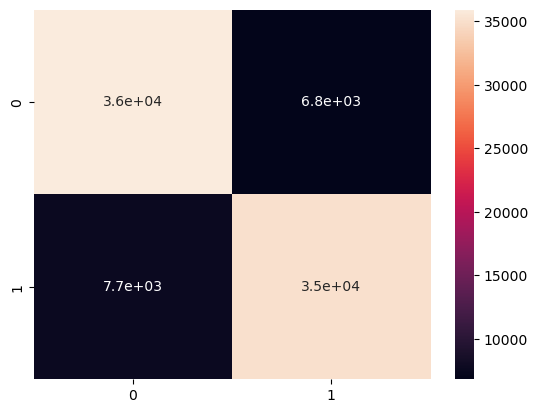

In [102]:
sns.heatmap(conf_met[5], annot=True)
print(conf_met[5])

Making the Confusion Matrix - Ada Boost

[[35159  7582]
 [ 6104 36637]]


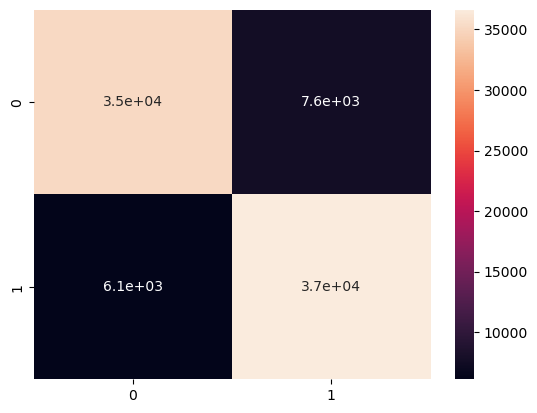

In [103]:
sns.heatmap(conf_met[7], annot=True)
print(conf_met[7])

ROC Curve Plot

In [104]:
fpr1, tpr1, thresholds1 = roc_curve(Y_test, Y_Pseries[6])  
fpr2, tpr2, thresholds2 = roc_curve(Y_test, Y_Pseries[5])
fpr3, tpr3, thresholds3 = roc_curve(Y_test, Y_Pseries[7])

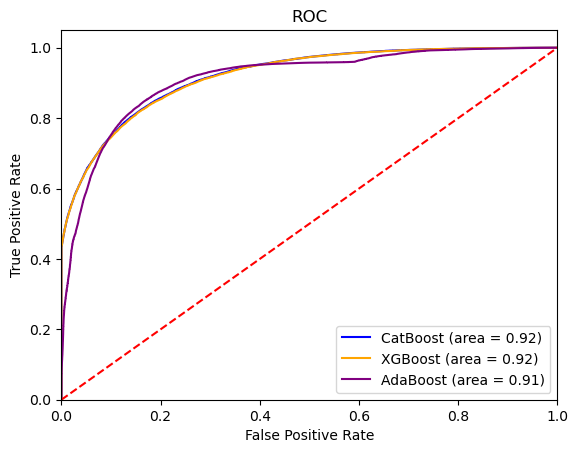

In [105]:
plt.plot(fpr1, tpr1, label='CatBoost (area = %0.2f)' % roc_list[6],color='blue')
plt.plot(fpr2, tpr2, label='XGBoost (area = %0.2f)' % roc_list[5],color='orange')
plt.plot(fpr3, tpr3, label='AdaBoost (area = %0.2f)' % roc_list[7],color='purple')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('ROC')

plt.show()

Catboost Model has the highest score, thus will use Catboost to retrain model

In [106]:
evaluation.loc[[6]]

,Model,ROC AUC Score,Accuracy Score,CM Score,Confusion Matrix,Time taken(s)
6,Catboost,0.919845,0.831543,0.831543,"[[35936, 6805], [7595, 35146]]",0:00:16.904670


### Feature Importance

In [148]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import shap

Model Train

In [108]:
model = CatBoostClassifier()
model.fit(X_train,Y_train)
Y_pred_FI = model.predict_proba(X_test)[:,1]

Learning rate set to 0.124429
0:	learn: 0.6489514	total: 58ms	remaining: 58s
1:	learn: 0.6129874	total: 83.5ms	remaining: 41.7s
2:	learn: 0.5856014	total: 105ms	remaining: 34.8s
3:	learn: 0.5671196	total: 121ms	remaining: 30.2s
4:	learn: 0.5534853	total: 138ms	remaining: 27.5s
5:	learn: 0.5407923	total: 155ms	remaining: 25.6s
6:	learn: 0.5303035	total: 172ms	remaining: 24.4s
7:	learn: 0.5217715	total: 190ms	remaining: 23.5s
8:	learn: 0.5121306	total: 207ms	remaining: 22.8s
9:	learn: 0.5048463	total: 223ms	remaining: 22s
10:	learn: 0.4980205	total: 239ms	remaining: 21.5s
11:	learn: 0.4913588	total: 256ms	remaining: 21.1s
12:	learn: 0.4839873	total: 274ms	remaining: 20.8s
13:	learn: 0.4806941	total: 293ms	remaining: 20.6s
14:	learn: 0.4751016	total: 314ms	remaining: 20.6s
15:	learn: 0.4718784	total: 337ms	remaining: 20.7s
16:	learn: 0.4694542	total: 355ms	remaining: 20.5s
17:	learn: 0.4673168	total: 373ms	remaining: 20.3s
18:	learn: 0.4638691	total: 390ms	remaining: 20.2s
19:	learn: 0.45

In [149]:
Y_pred_FI

array([0.7678851 , 0.62855008, 0.05285083, ..., 0.9996749 , 0.03122055,
       0.99752634])

Model Testing

In [109]:
score = roc_auc_score(Y_test,Y_pred_FI)
score

0.919845118463091

In [110]:
rmse = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))
rmse


0.4104345467446761

Model Evaluation

In [111]:
len(model.feature_importances_)

14

In [112]:
model.feature_importances_

array([7.43647663, 6.87174329, 6.98143777, 7.07972094, 5.14737545,
       6.29016271, 8.68247264, 6.76520193, 8.37071197, 3.15648795,
       8.95141273, 7.00418084, 8.3028497 , 8.95976545])

Plot the tree-based importance

Text(0.5, 1.0, 'Feature Importance')

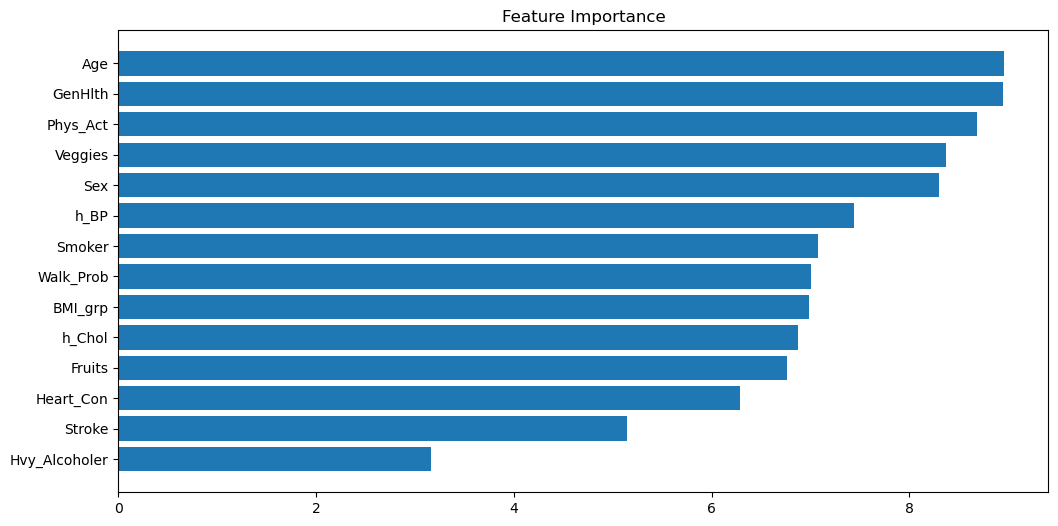

In [113]:

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')


In [154]:

for i,v in enumerate(feature_importance[sorted_idx]):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 3.15649
Feature: 1, Score: 5.14738
Feature: 2, Score: 7.07972
Feature: 3, Score: 6.76520
Feature: 4, Score: 6.29016
Feature: 5, Score: 7.00418
Feature: 6, Score: 8.30285
Feature: 7, Score: 8.68247
Feature: 8, Score: 8.37071
Feature: 9, Score: 6.87174
Feature: 10, Score: 7.43648
Feature: 11, Score: 8.95977
Feature: 12, Score: 6.98144
Feature: 13, Score: 8.95141


<AxesSubplot:>

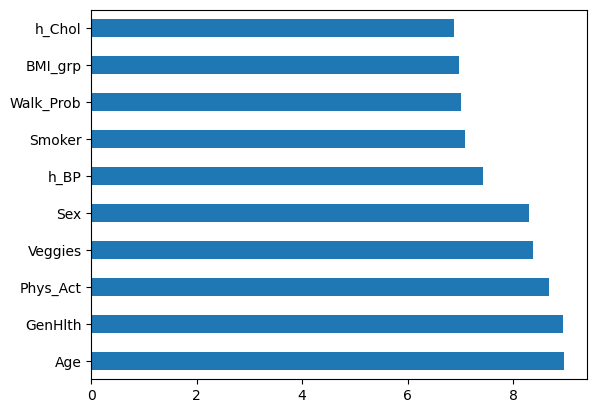

In [114]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

Plot the permutation importance.

Text(0.5, 1.0, 'Permutation Importance')

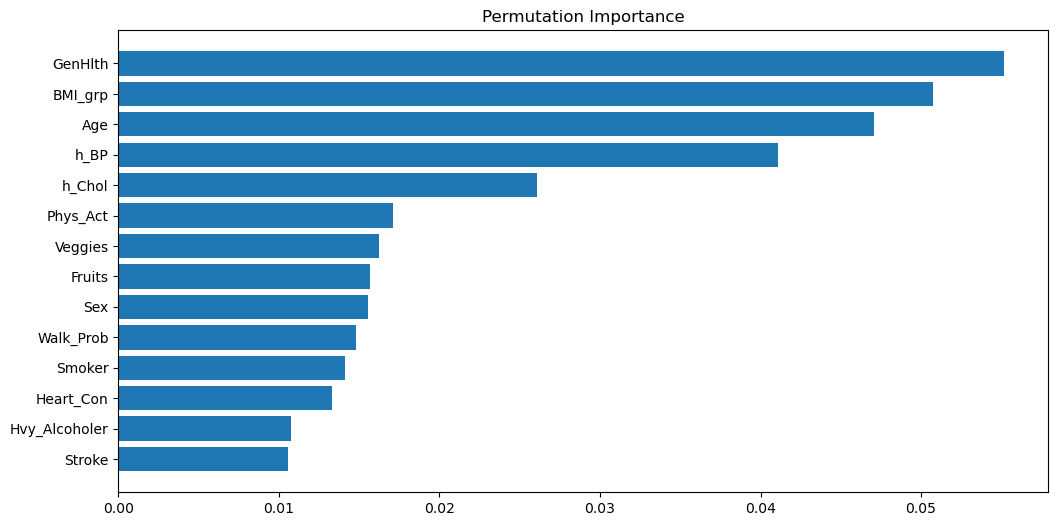

In [115]:

perm_importance = permutation_importance(model, X_test, Y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance')


In [153]:
for i,v in enumerate(perm_importance.importances_mean[sorted_idx]):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01075
Feature: 1, Score: 0.01055
Feature: 2, Score: 0.01409
Feature: 3, Score: 0.01567
Feature: 4, Score: 0.01330
Feature: 5, Score: 0.01482
Feature: 6, Score: 0.01557
Feature: 7, Score: 0.01709
Feature: 8, Score: 0.01624
Feature: 9, Score: 0.02610
Feature: 10, Score: 0.04112
Feature: 11, Score: 0.04710
Feature: 12, Score: 0.05077
Feature: 13, Score: 0.05518


Plot the mean absolute value of the SHAP values


Text(0.5, 1.0, 'SHAP Importance')

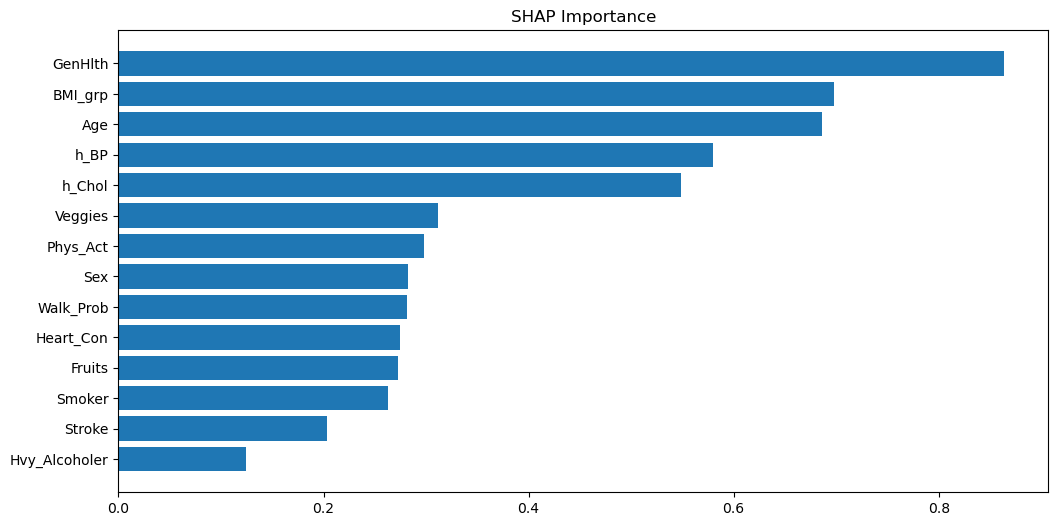

In [116]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('SHAP Importance')


In [151]:
for i,v in enumerate(shap_importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.57985
Feature: 1, Score: 0.54851
Feature: 2, Score: 0.69756
Feature: 3, Score: 0.26319
Feature: 4, Score: 0.20372
Feature: 5, Score: 0.27460
Feature: 6, Score: 0.29834
Feature: 7, Score: 0.27278
Feature: 8, Score: 0.31158
Feature: 9, Score: 0.12419
Feature: 10, Score: 0.86384
Feature: 11, Score: 0.28094
Feature: 12, Score: 0.28253
Feature: 13, Score: 0.68626


A function to plot this directly.



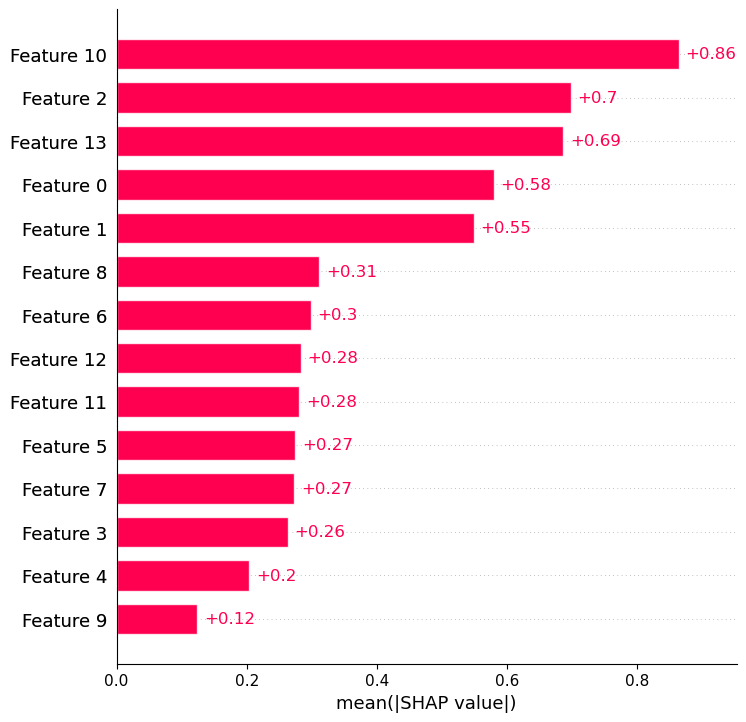

In [117]:
shap.plots.bar(shap_values, max_display=X_test.shape[0])


Methods for hyperparameter tuning
As earlier stated the overall aim of hyperparameter tuning is to optimize the performance of the model based on a certain metric. For example, Root Mean Squared Error (RMSE) for regression problems and accuracy score for classification problems.

There are several approaches to hyperparameter tuning. In this article I will be focusing on these three:

Manual tuning
Grid Search
Randomized search

### Catboost with Grid Search

GridSearchCV is an automated way of hyperparameter tuning. This method works by exhaustively searching through all the values in the hyperparameter space. It basically computes all the possible combinations of all the hyperparameters, evaluates the performance for each combination using cross validation, and saves the best hyperparameters. This makes grid search computationally expensive.

For this method, we need to specify a grid which is a python dictionary that contains hyperparameters and their corresponding values.



In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


Define a model.

In [119]:
#Instantiate CatBoostClassifier
cbc = CatBoostClassifier()

Define the range of possible values for all hyperparameters.

In [120]:
#create the grid
grid = {'max_depth': [5,7,9],'n_estimators':[100, 200, 300]}

Define a method for sampling hyperparameter values.

In [121]:
#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

In [122]:
#fit the model
gscv.fit(X_train,Y_train)

Learning rate set to 0.5
0:	learn: 0.5856693	total: 16.4ms	remaining: 1.62s
1:	learn: 0.5464587	total: 25.7ms	remaining: 1.26s
2:	learn: 0.5247431	total: 38.6ms	remaining: 1.25s
3:	learn: 0.5094917	total: 47.9ms	remaining: 1.15s
4:	learn: 0.4982554	total: 56.5ms	remaining: 1.07s
5:	learn: 0.4898923	total: 64.9ms	remaining: 1.02s
6:	learn: 0.4855752	total: 74ms	remaining: 983ms
7:	learn: 0.4768123	total: 83.8ms	remaining: 964ms
8:	learn: 0.4724712	total: 94.8ms	remaining: 958ms
9:	learn: 0.4648743	total: 104ms	remaining: 932ms
10:	learn: 0.4609432	total: 113ms	remaining: 917ms
11:	learn: 0.4596297	total: 121ms	remaining: 890ms
12:	learn: 0.4571735	total: 132ms	remaining: 880ms
13:	learn: 0.4496631	total: 142ms	remaining: 873ms
14:	learn: 0.4455479	total: 151ms	remaining: 855ms
15:	learn: 0.4426831	total: 160ms	remaining: 840ms
16:	learn: 0.4385596	total: 169ms	remaining: 824ms
17:	learn: 0.4313078	total: 178ms	remaining: 810ms
18:	learn: 0.4233481	total: 192ms	remaining: 817ms
19:	learn

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc72eb1fd90>,
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [123]:
#returns the estimator with the best performance
print(gscv.best_estimator_)


In [124]:
#returns the best score
print(gscv.best_score_)

0.8334629865355009


In [125]:
#returns the best parameters
print(gscv.best_params_)

{'max_depth': 9, 'n_estimators': 300}


In [126]:
grid_pred = gscv.predict(X_test) 

In [127]:
Y_test

3468      1.0
207261    0.0
147729    0.0
401174    1.0
307769    1.0
         ... 
399747    1.0
266937    1.0
427142    1.0
192999    0.0
321643    1.0
Name: Diabetes, Length: 85482, dtype: float64

In [128]:
Y_pred

array([1., 1., 0., ..., 0., 0., 1.])

In [129]:
grid_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [130]:
print(classification_report(Y_test, Y_pred.round())) 


              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73     42741
         1.0       0.73      0.77      0.75     42741

    accuracy                           0.74     85482
   macro avg       0.74      0.74      0.74     85482
weighted avg       0.74      0.74      0.74     85482



In [131]:
print(classification_report(Y_test, grid_pred)) 


              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84     42741
         1.0       0.84      0.83      0.84     42741

    accuracy                           0.84     85482
   macro avg       0.84      0.84      0.84     85482
weighted avg       0.84      0.84      0.84     85482



GridSearchCV takes a number of hyperparameters. The most important ones are estimator, param_grid, scoring, and cv. Estimator specifies the algorithm to be used, param_grid is a dictionary containing all the hyperparameters for the algorithm specified, scoring is the metric used to evaluate performance e.g accuracy for classification and RMSE for regression, while cv is the number of folds to be used for cross-validation.

GridSearchCV has a number of attributes that can be used on the model. Some of these attributes are best_estimator_, best_score_, best_params_.